In [71]:
import pandas as pd
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import math as math
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


In [59]:
EB1_NSC = pd.read_csv('/Users/djl358/Documents/new_search/EB1_NSC.csv')

In [11]:
EB1_NSC.columns.values

array(['140_PP 140_485 CC', 'Center', 'Type', 'Revice Date(RD)',
       'FP Notice Date', 'Days from RD to FP Notice Date', 'Unnamed: 6',
       'FP Date', 'Walk in?', 'Location', 'AP_EAD AD',
       'Days from RD to AP_EAD AD', '485 AD', 'Days from RD',
       'Days from FP Date to 485 AD', 'Days from RD to 485 AD'], dtype=object)

In [25]:
EB1_NSC['Type'].value_counts()

EB1A              577
EB1B              434
EB1a               16
EB1b               12
EB1C               10
EB2                 5
Eb1A                4
EB1 C               2
Eb1b                2
EB2/EB1B            1
EB1A               1
EB2B                1
EB1A-dependent      1
Eb1C                1
eb1b                1
NIW                 1
EB2-NIW             1
NIW ROW             1
Name: Type, dtype: int64

In [60]:
EB1_NSC['Days from RD to 485 AD']=EB1_NSC['Days from RD to 485 AD'].apply(lambda x: x if x else np.nan())

### compare the average Approve time between EB1A and EB1B

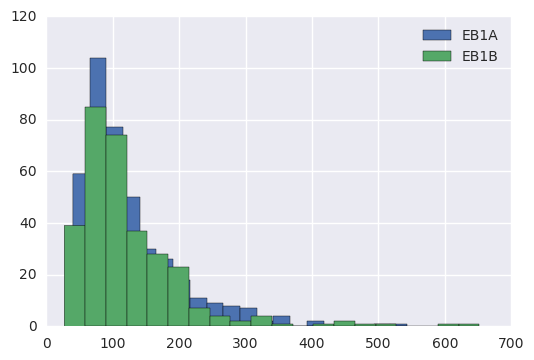

In [64]:
EB1_NSC.loc[EB1_NSC.Type=='EB1A']['Days from RD to 485 AD'].hist(bins=20, label='EB1A')
EB1_NSC.loc[EB1_NSC.Type=='EB1B']['Days from RD to 485 AD'].hist(bins=20, label='EB1B')
plt.legend()

In [116]:
stats.ttest_ind(EB1_NSC.loc[EB1_NSC.Type=='EB1A']['Days from RD to 485 AD'].dropna(), 
                EB1_NSC.loc[EB1_NSC.Type=='EB1B']['Days from RD to 485 AD'].dropna(), equal_var=False)

Ttest_indResult(statistic=0.3784092313457843, pvalue=0.70525505063701721)

In [65]:
# trans
EB1_NSC['t_ad_485_log'] = EB1_NSC['Days from RD to 485 AD'].apply(lambda x: math.log(x) if x else np.nan())

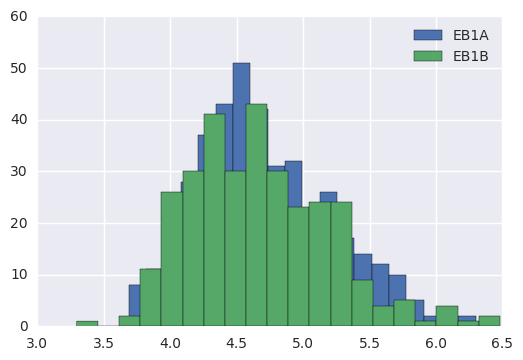

In [63]:
EB1_NSC.loc[EB1_NSC.Type=='EB1A']['t_ad_485_log'].hist(bins=20, label='EB1A')
EB1_NSC.loc[EB1_NSC.Type=='EB1B']['t_ad_485_log'].hist(bins=20, label='EB1B')
plt.legend()

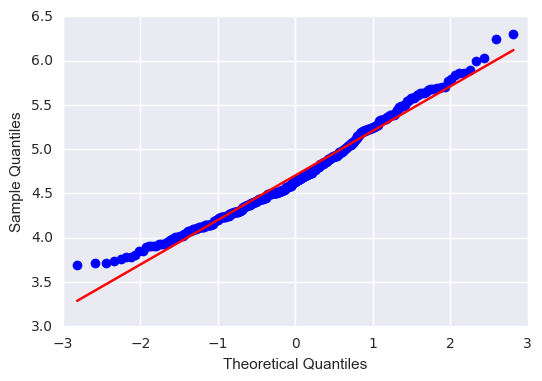

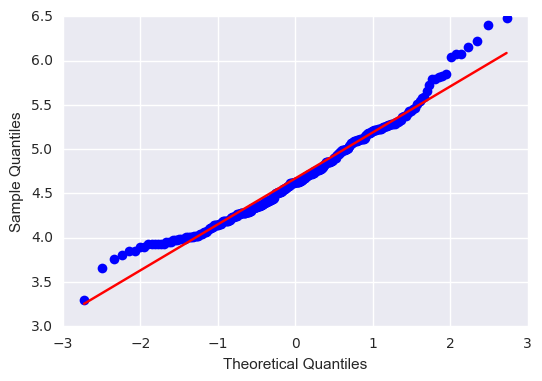

In [105]:
sm.qqplot(EB1_NSC.loc[EB1_NSC.Type=='EB1A']['t_ad_485_log'].dropna(), line='s')
plt.show()
sm.qqplot(EB1_NSC.loc[EB1_NSC.Type=='EB1B']['t_ad_485_log'].dropna(), line='s')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


In [11]:
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]



In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
np.mean(regr.predict(diabetes_X_test) - diabetes_y_test) ** 2

301.26011550065681

In [35]:
regr.score(diabetes_X_test, diabetes_y_test)

0.47257544798227136

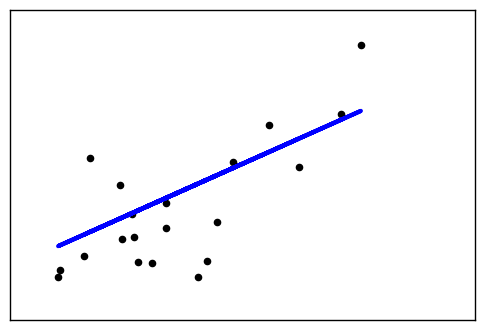

In [36]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
        
plt.show()

In [41]:
lassom = linear_model.Lasso(alpha=1)
lassom.fit(diabetes.data, diabetes.target)
print(lassom.coef_)


[   0.           -0.          367.70185207    6.30190419    0.            0.
   -0.            0.          307.6057        0.        ]


In [42]:
a=[12,3,3]
a.index(12)

0

In [ ]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.svc() # there is various option associated with it, this is simple for classification. You can refer link, for mo# re detail.
# Train the model using the training sets and check score
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(x_test)
